In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = "/data/put_data/cmchang/gynecology/data/"
d = pd.read_csv(os.path.join(data_dir, 'data_merged.csv'))

# ['variability', 'deceleration', 'management', 'UA']

FLAG_target = 'variability'
n_classes = len(set(d[FLAG_target]))

In [16]:
key = list(d['key'])
B = np.array(d[[k for k in d.columns if 'b-' in k]])
M = np.array(d[[k for k in d.columns if 'm-' in k]])

In [5]:
assert B.shape[0]==M.shape[0], 'B, M not the same dimension'

In [6]:
def get_n_zeros(d):
    n_zeros = list()
    for i in range(d.shape[0]):
        n_zeros.append(sum(d[i,:] ==0))
    return np.array(n_zeros)

In [31]:
M0.mean()

48.78260869565217

In [32]:
B0.mean()

31.63768115942029

In [7]:
M0 = get_n_zeros(M)
B0 = get_n_zeros(B)

In [35]:
M0.min(), M0.mean(), M0.max()

(3, 48.78260869565217, 243)

In [36]:
B0.min(), B0.mean(), B0.max()

(2, 31.63768115942029, 144)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


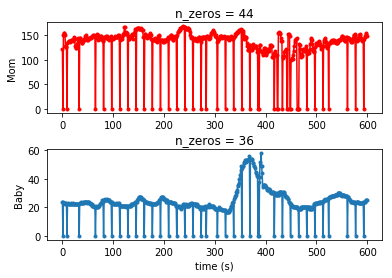

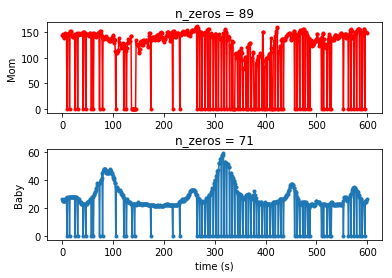

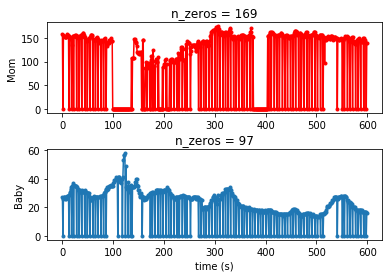

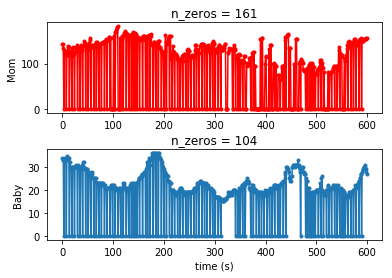

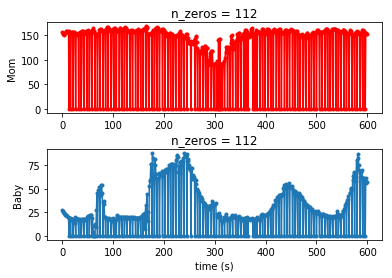

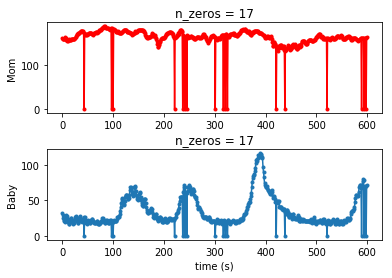

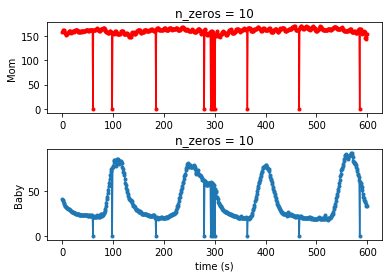

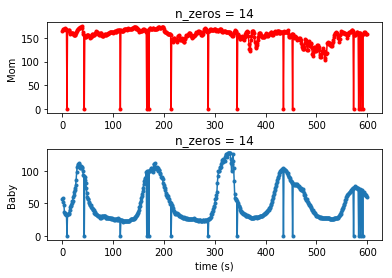

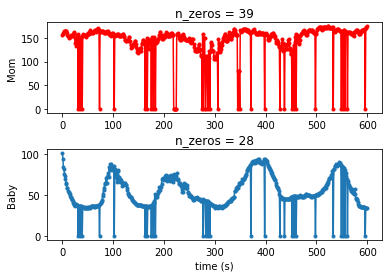

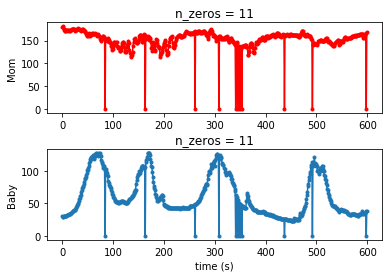

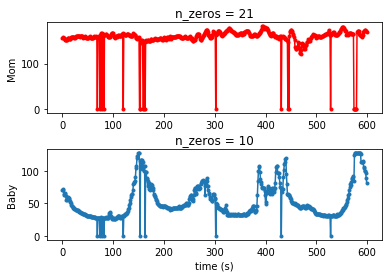

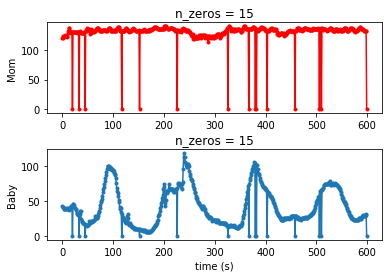

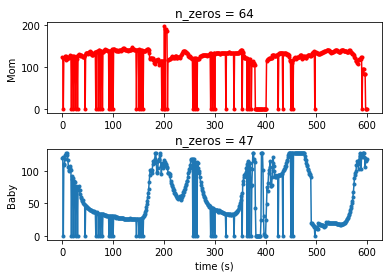

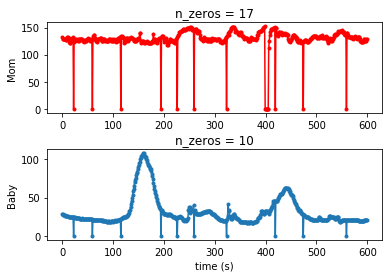

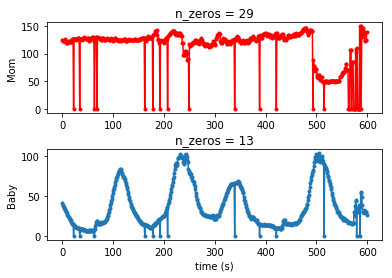

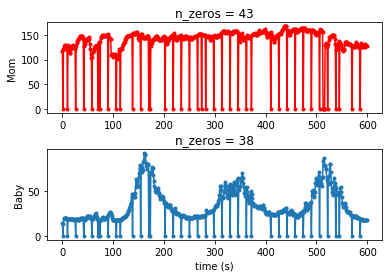

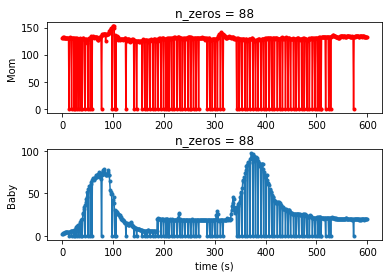

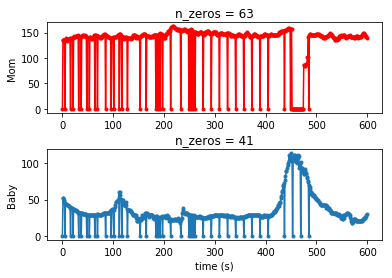

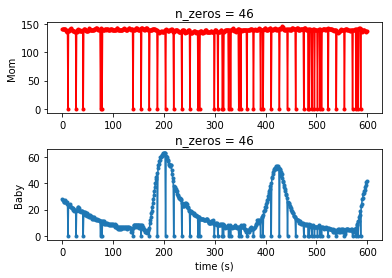

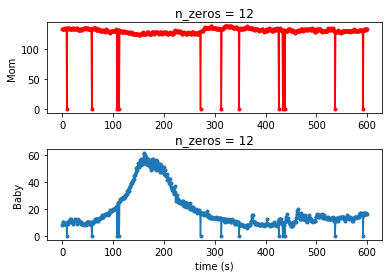

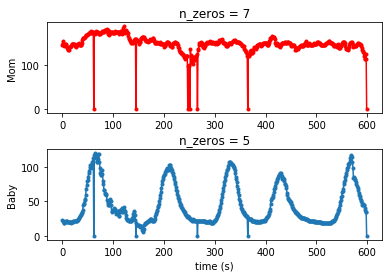

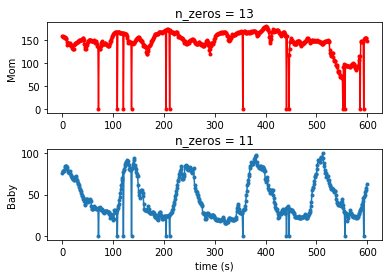

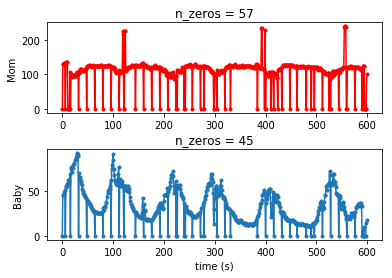

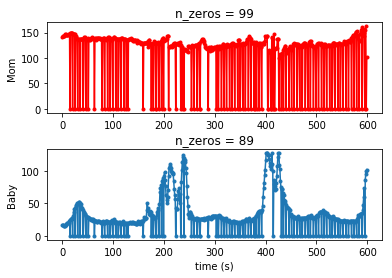

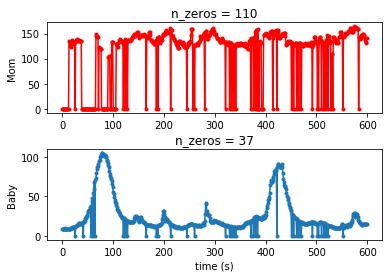

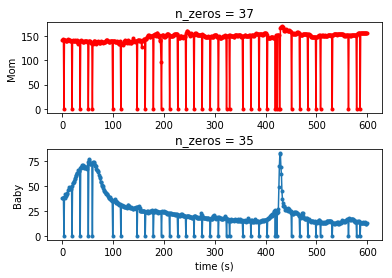

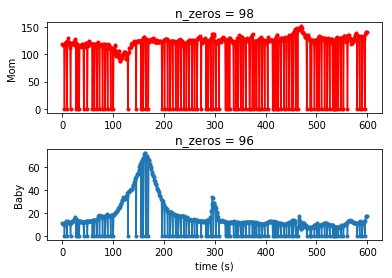

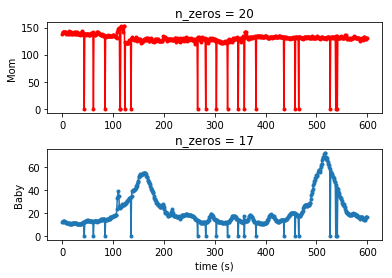

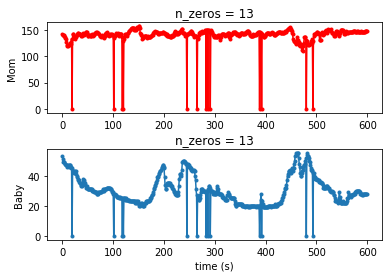

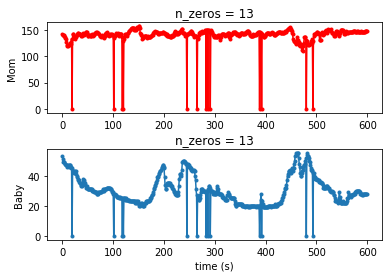

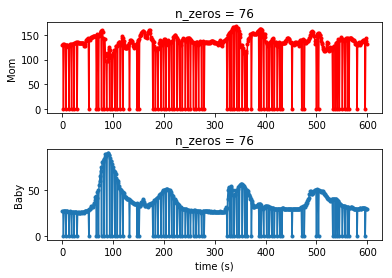

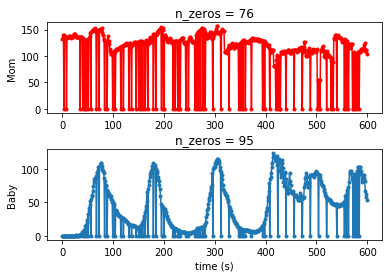

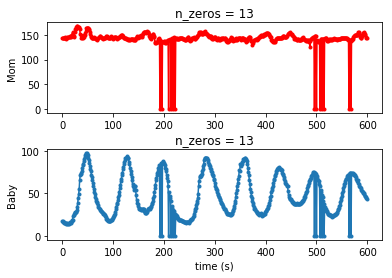

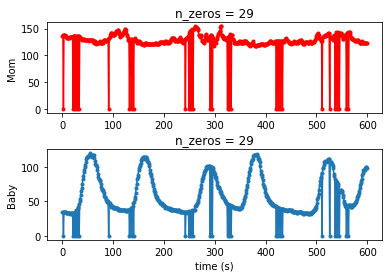

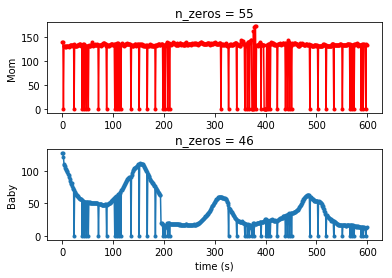

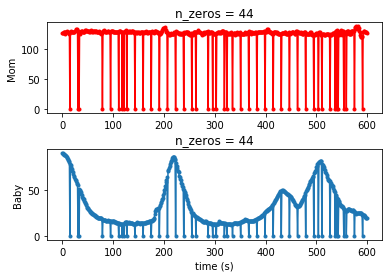

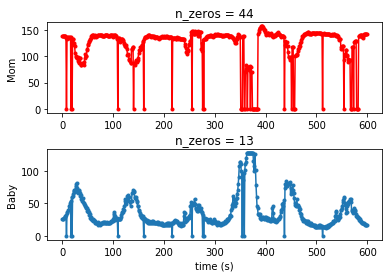

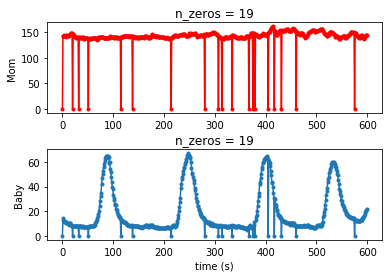

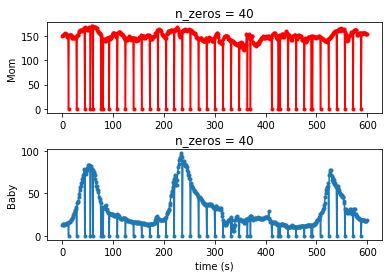

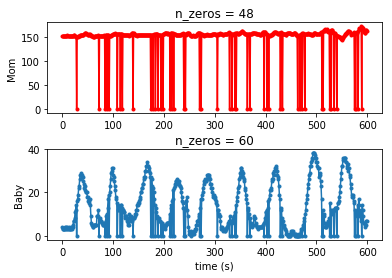

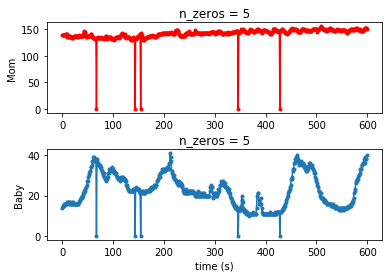

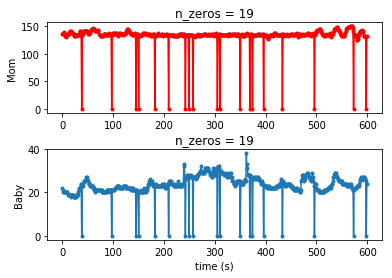

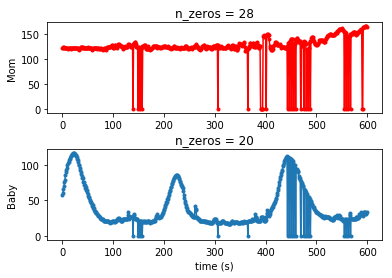

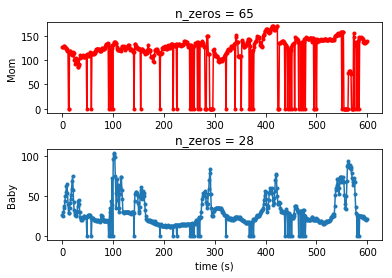

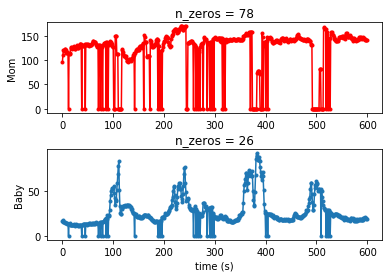

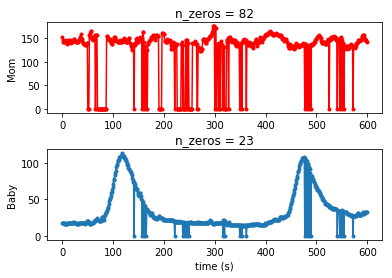

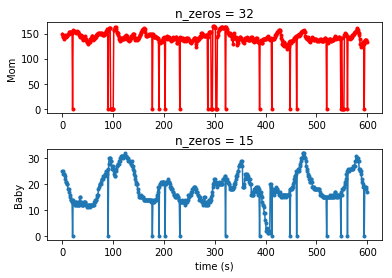

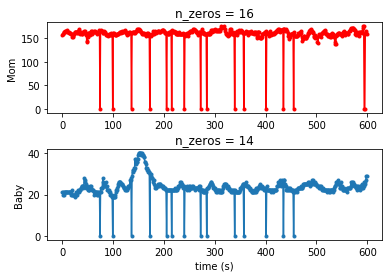

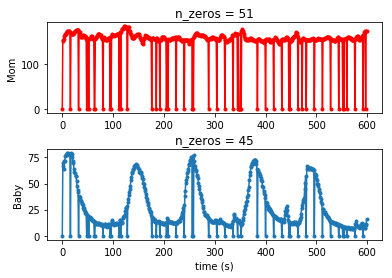

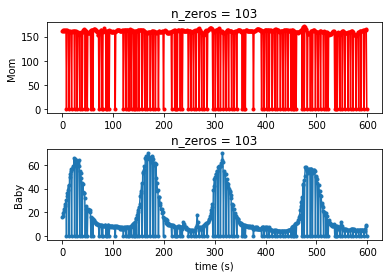

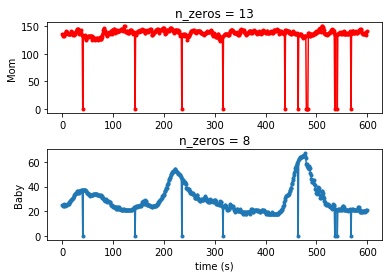

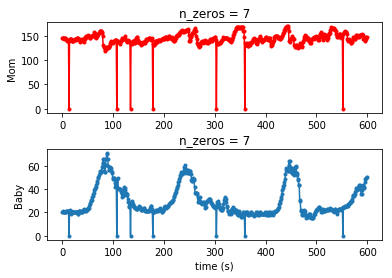

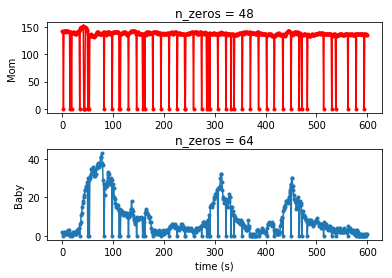

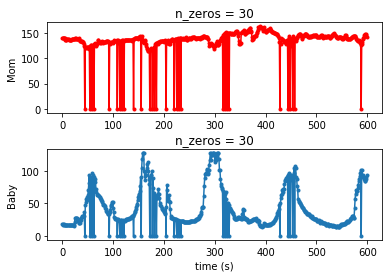

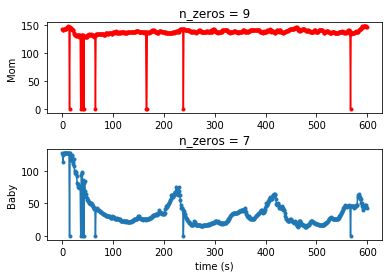

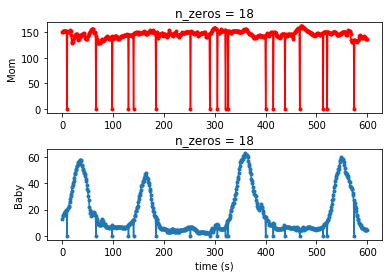

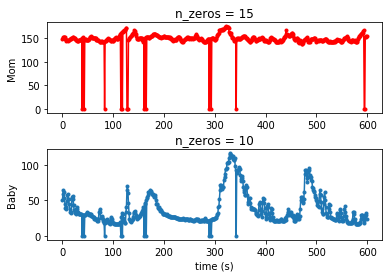

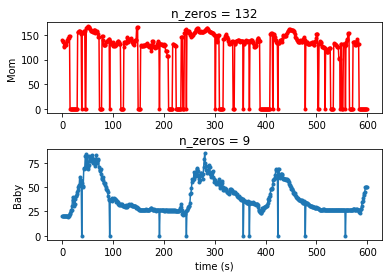

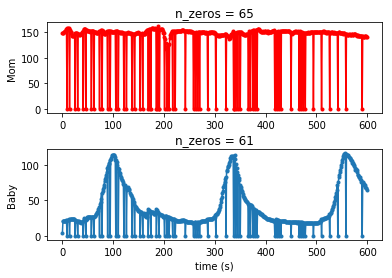

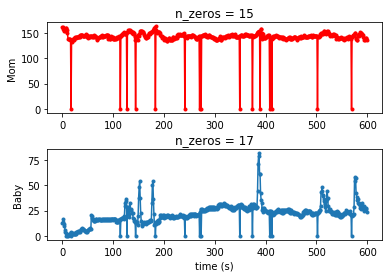

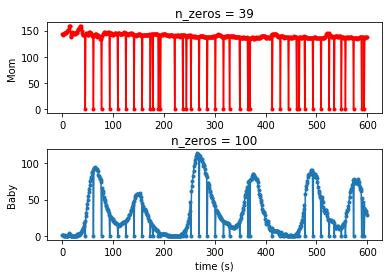

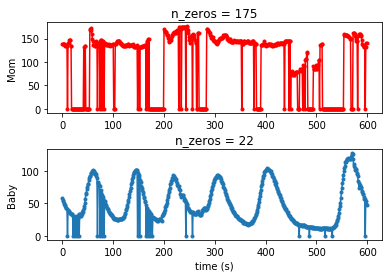

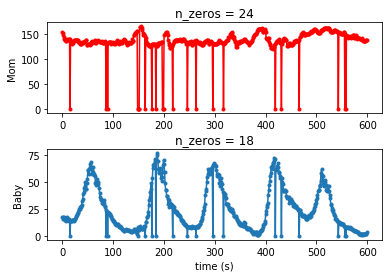

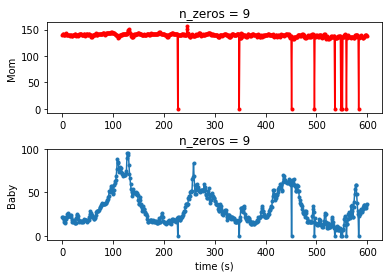

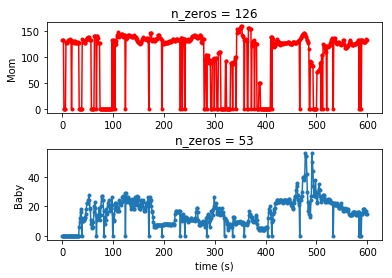

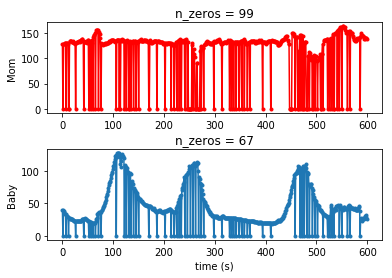

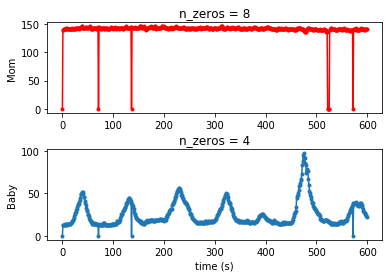

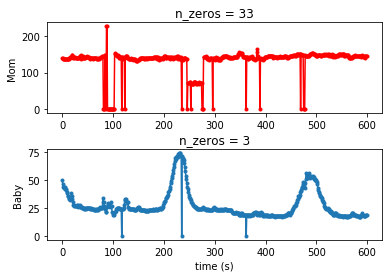

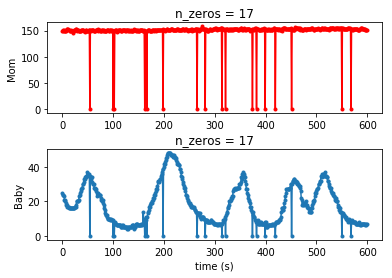

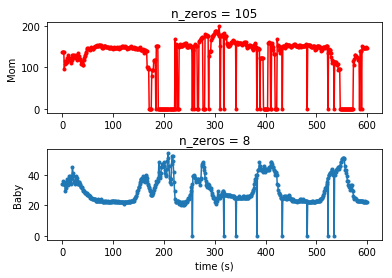

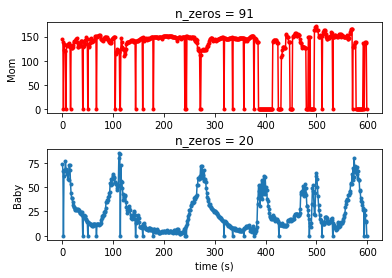

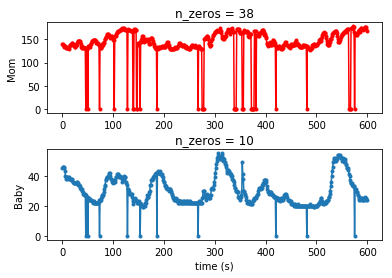

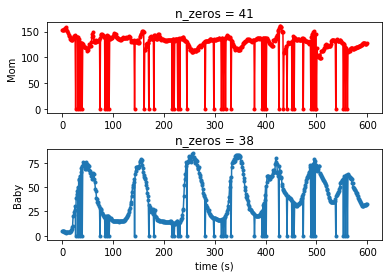

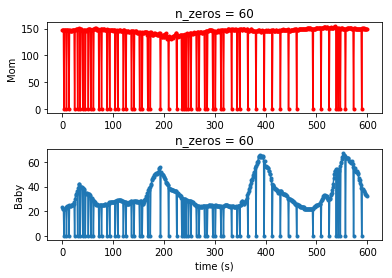

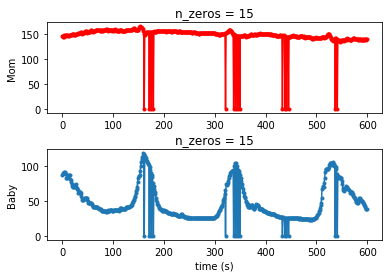

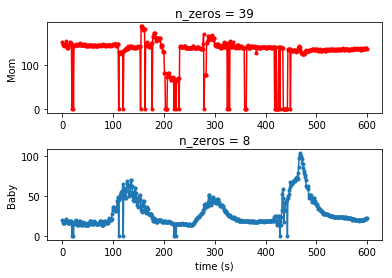

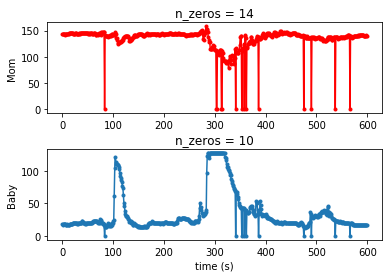

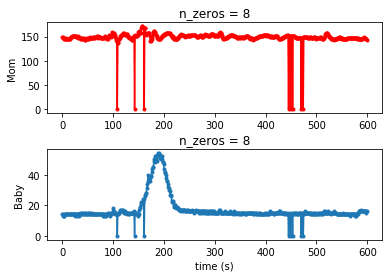

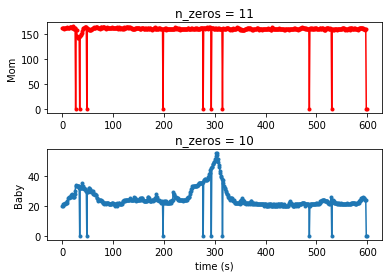

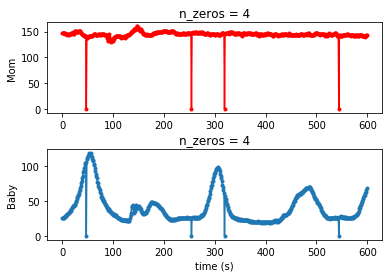

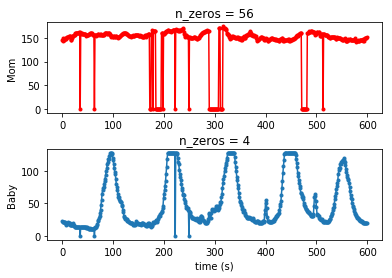

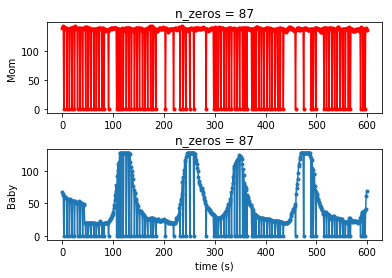

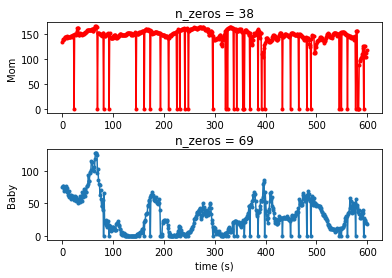

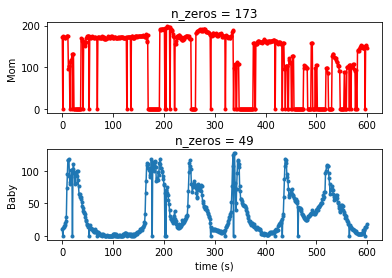

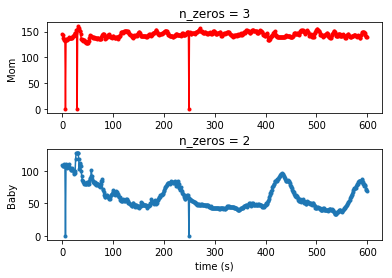

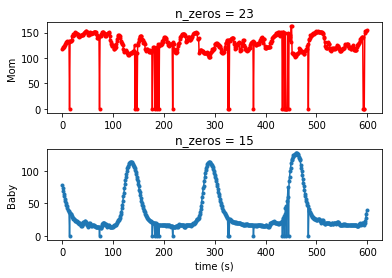

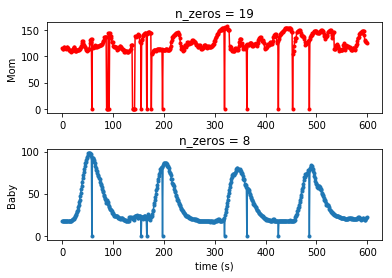

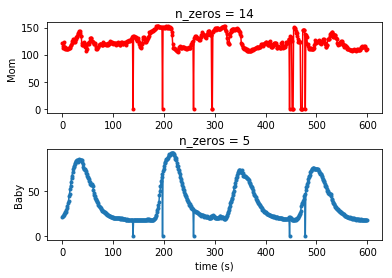

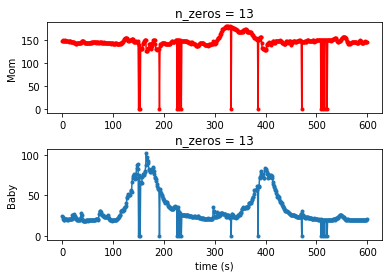

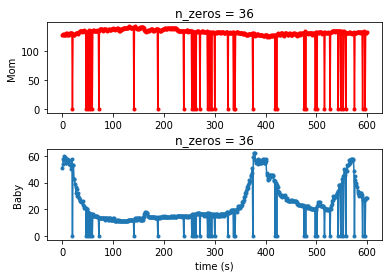

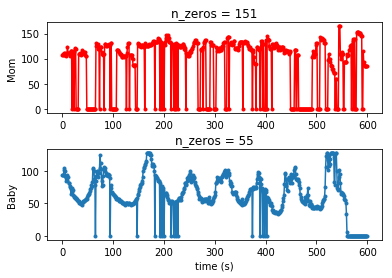

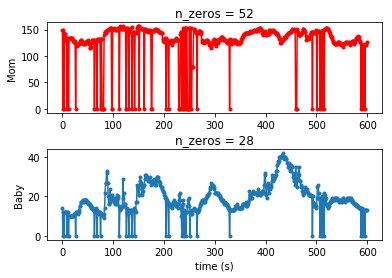

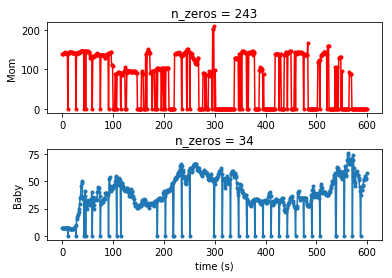

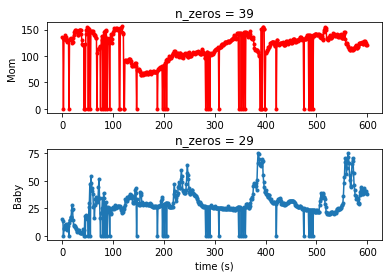

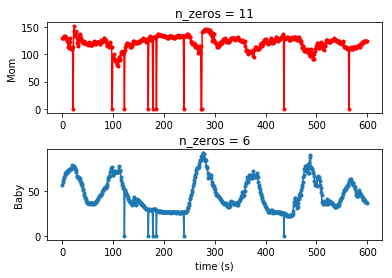

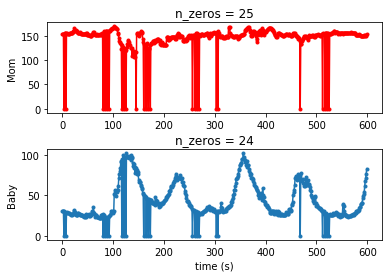

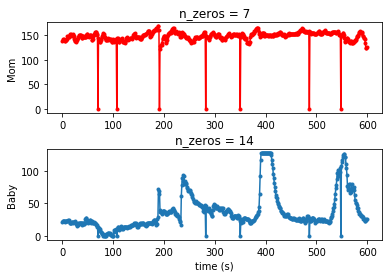

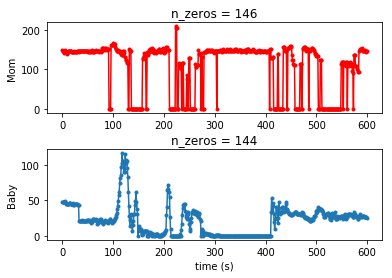

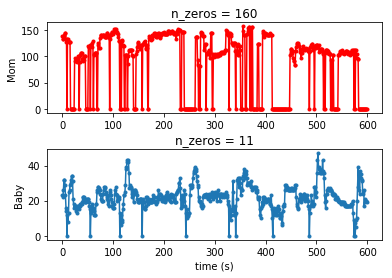

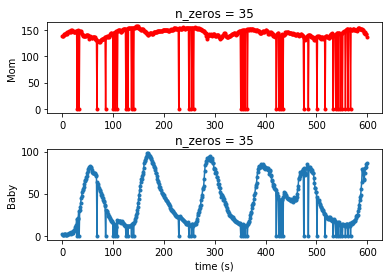

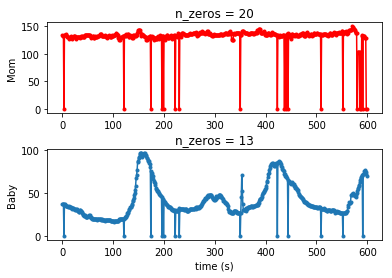

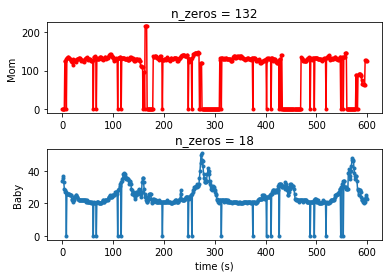

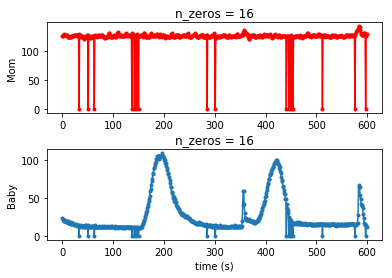

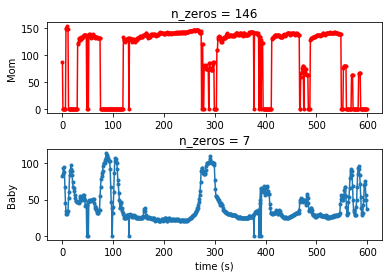

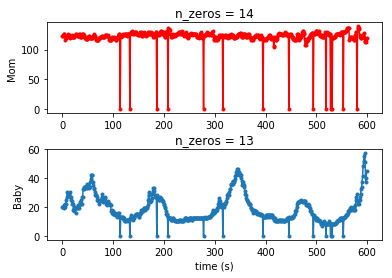

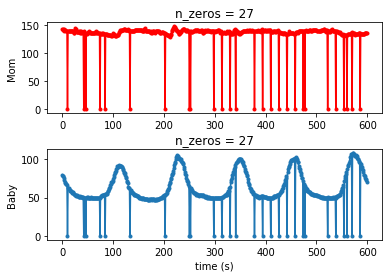

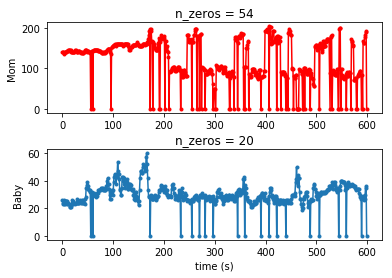

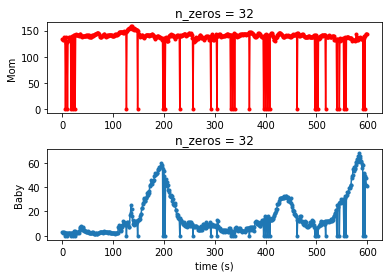

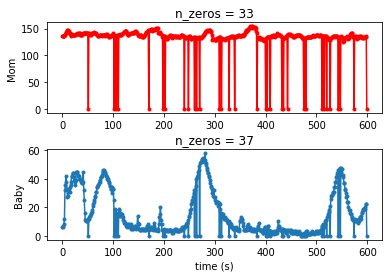

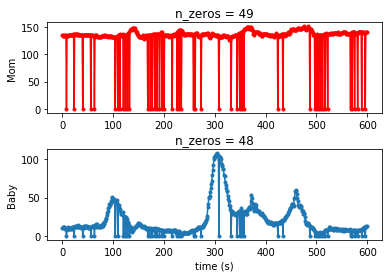

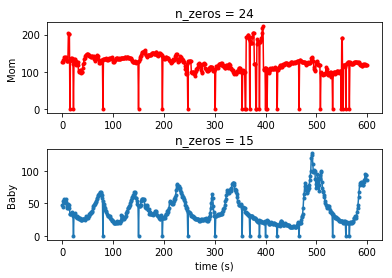

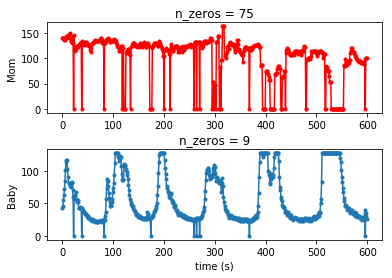

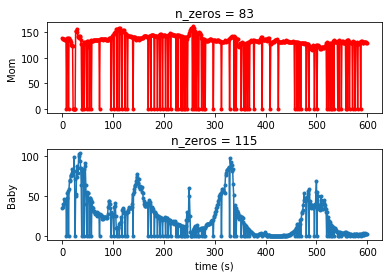

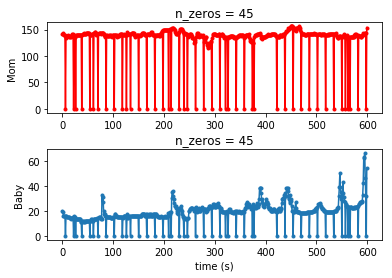

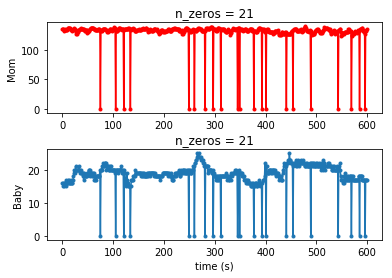

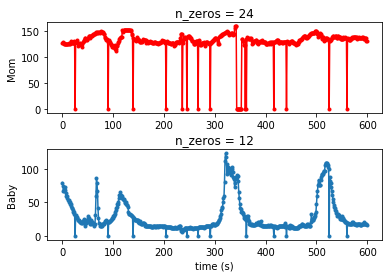

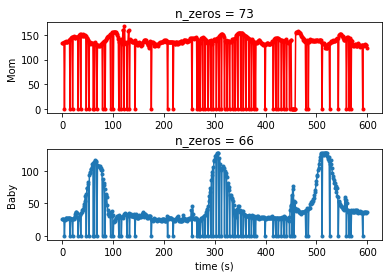

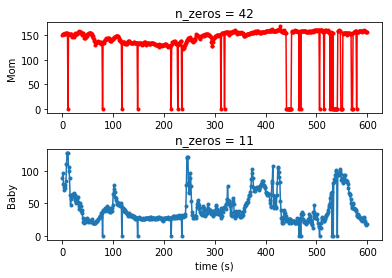

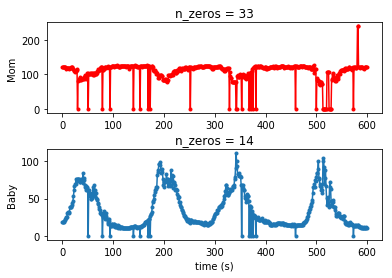

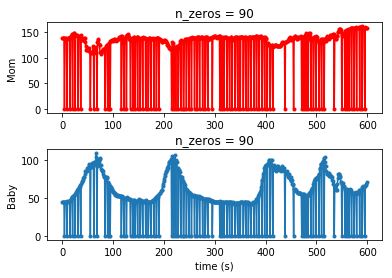

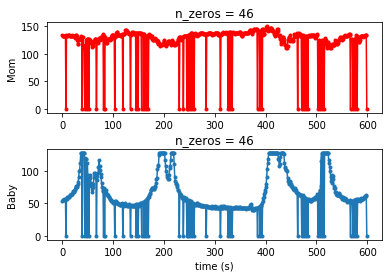

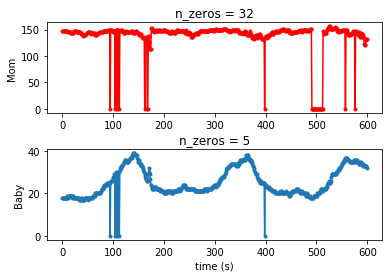

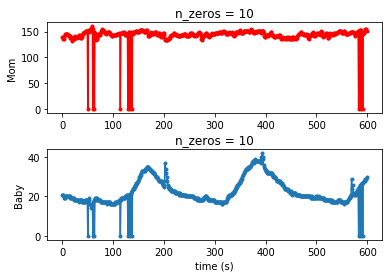

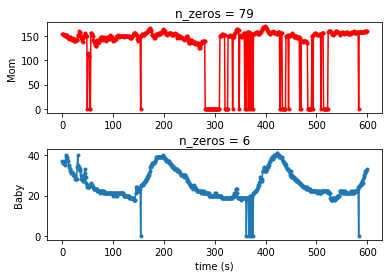

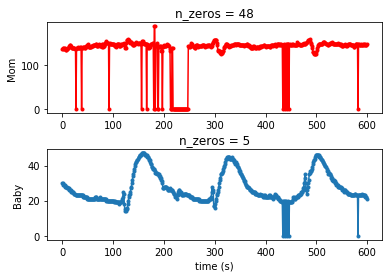

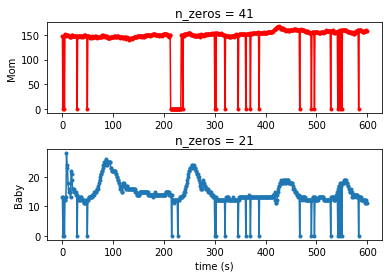

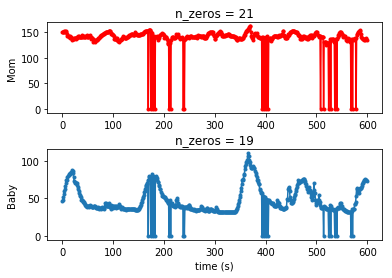

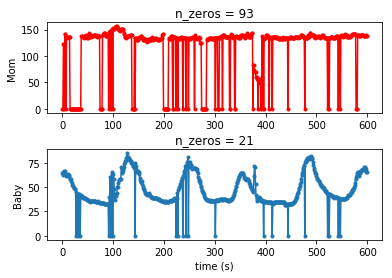

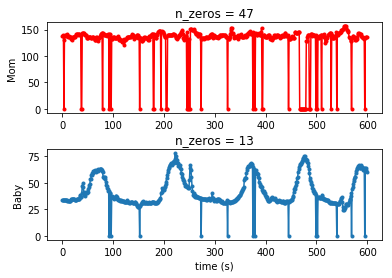

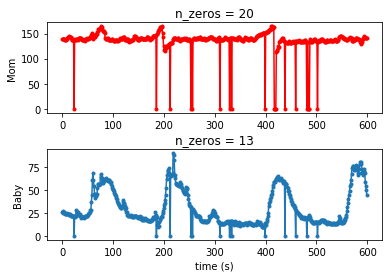

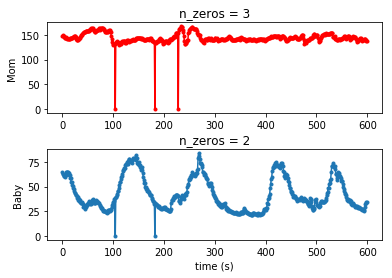

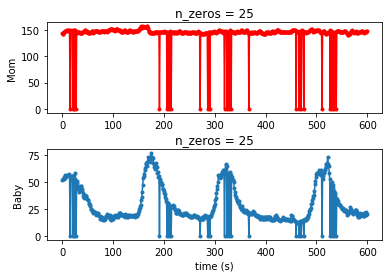

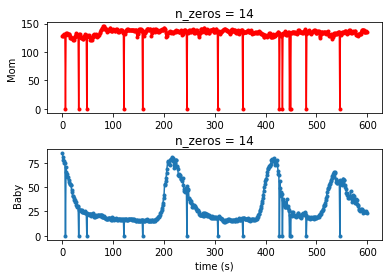

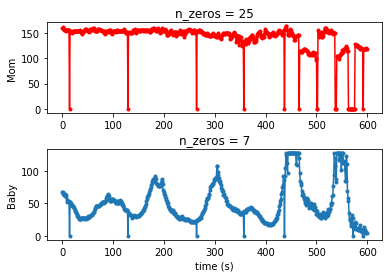

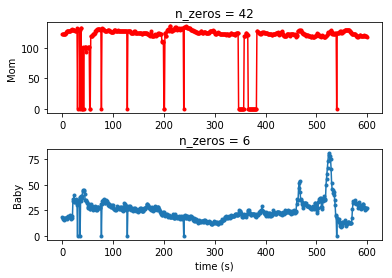

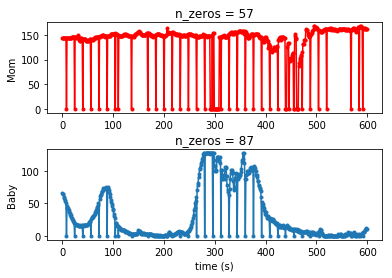

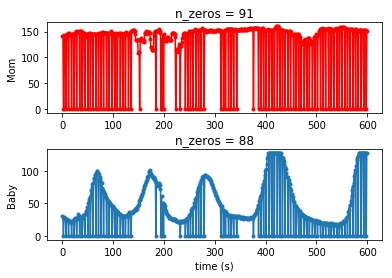

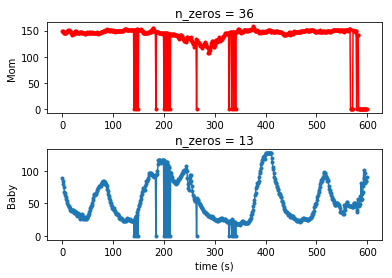

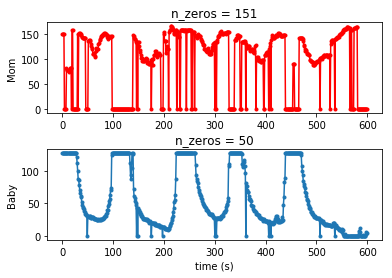

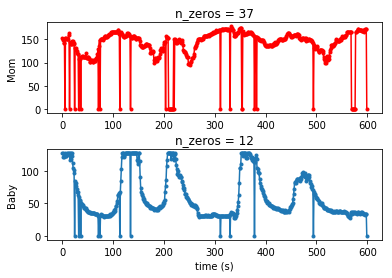

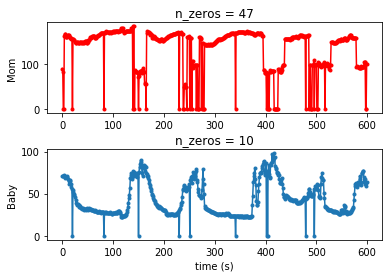

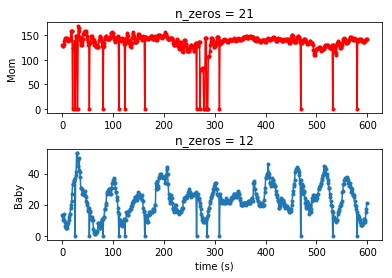

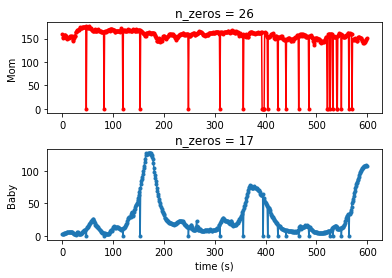

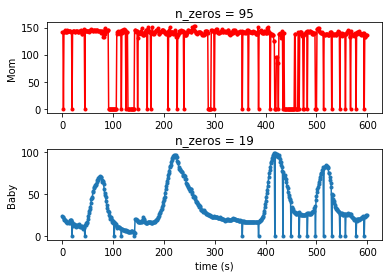

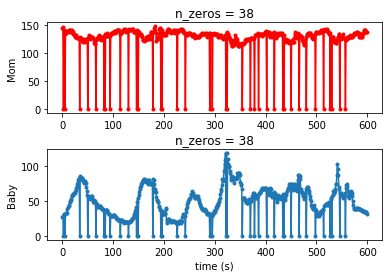

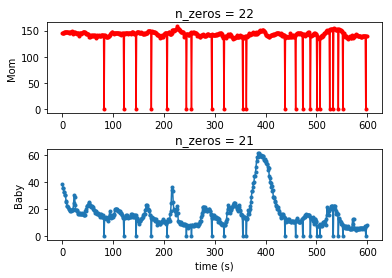

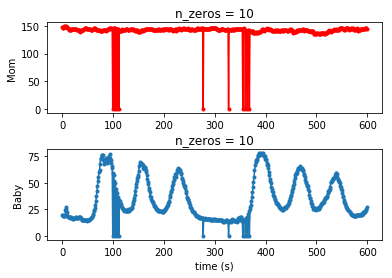

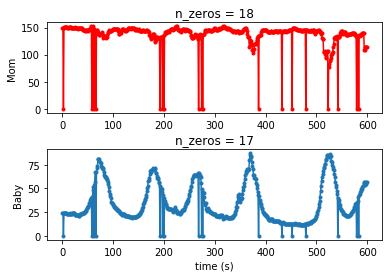

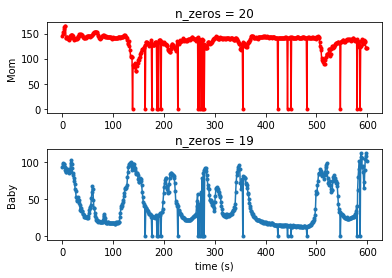

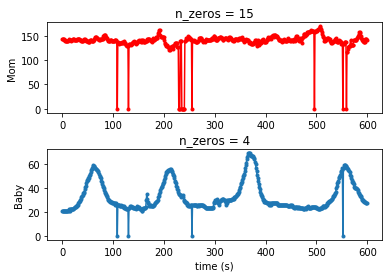

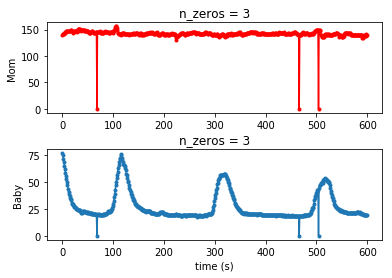

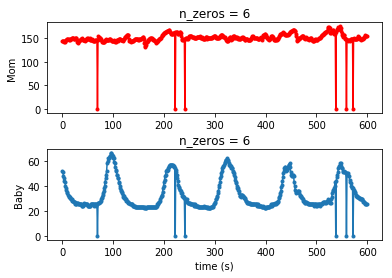

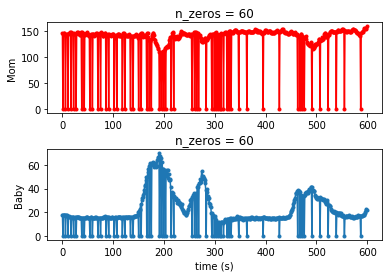

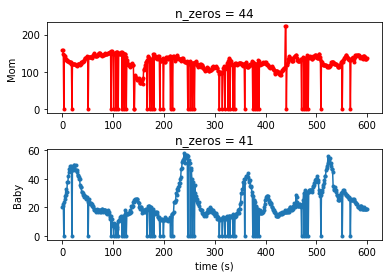

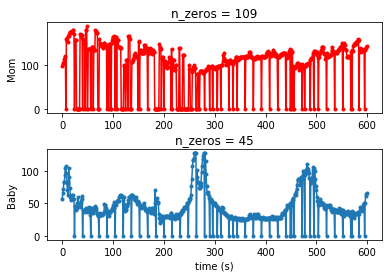

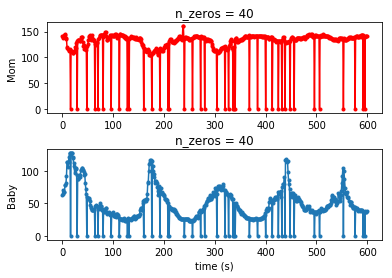

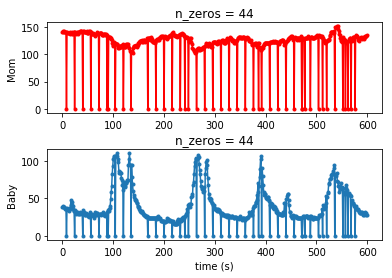

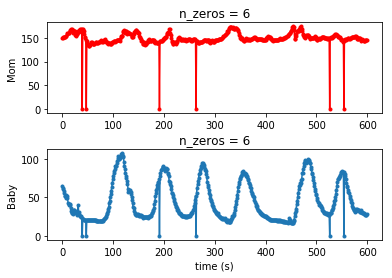

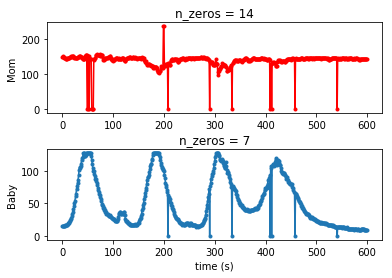

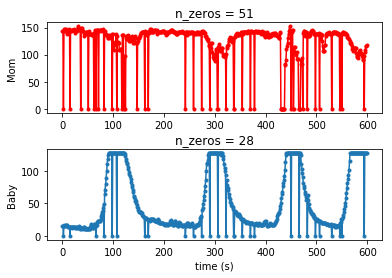

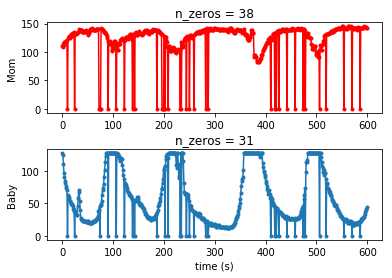

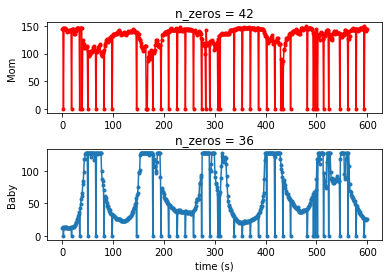

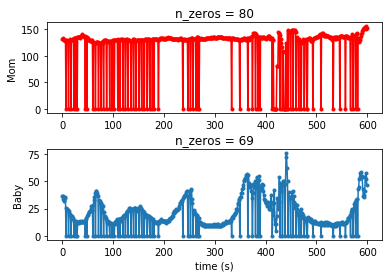

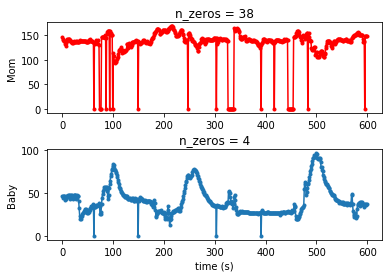

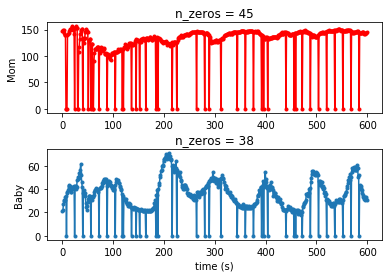

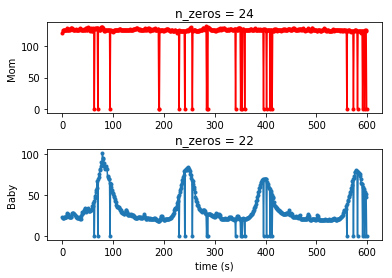

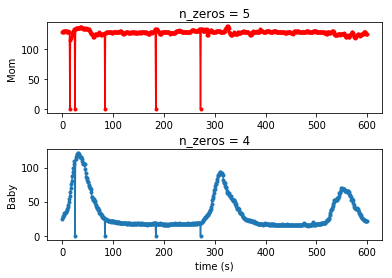

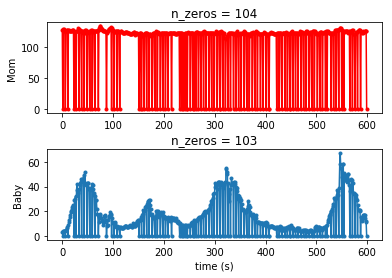

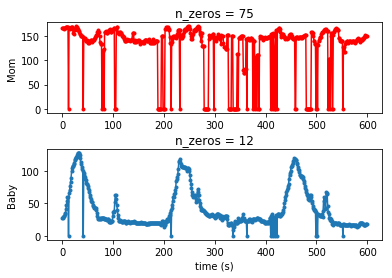

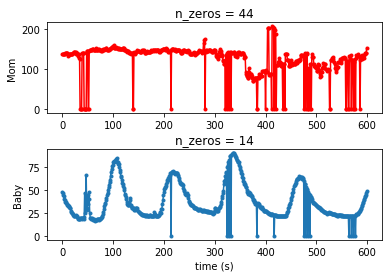

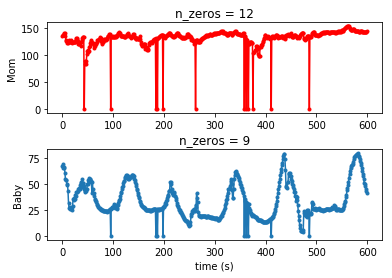

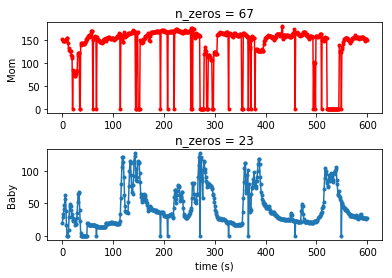

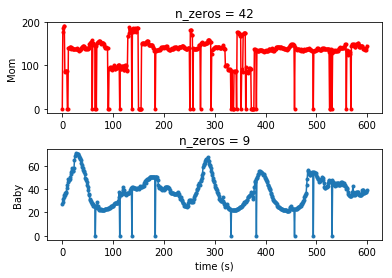

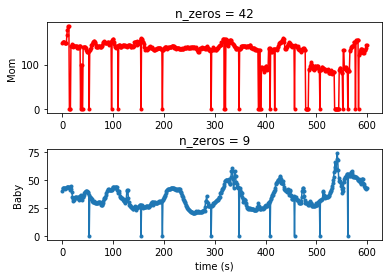

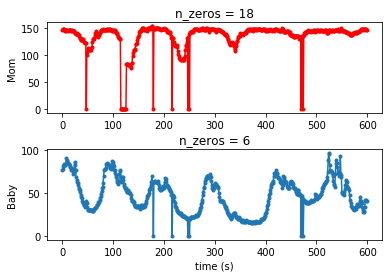

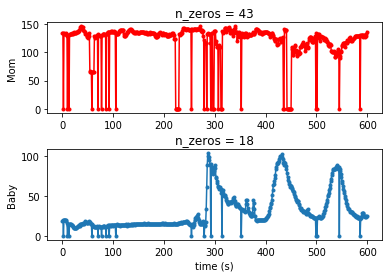

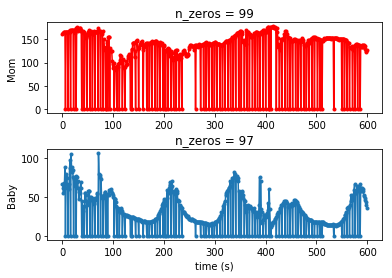

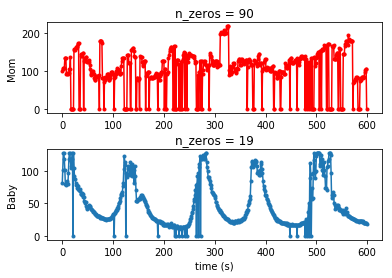

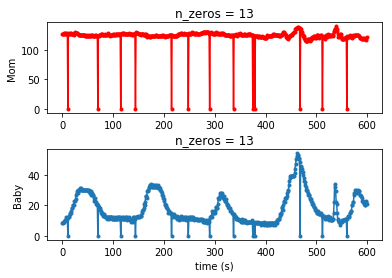

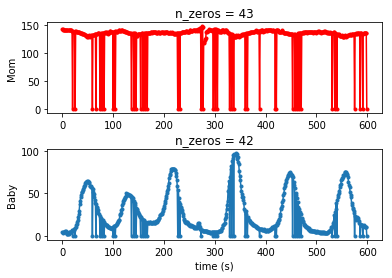

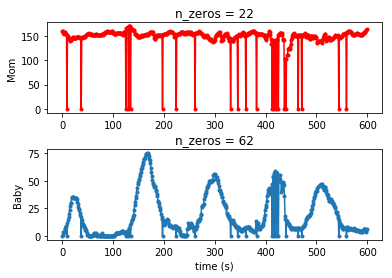

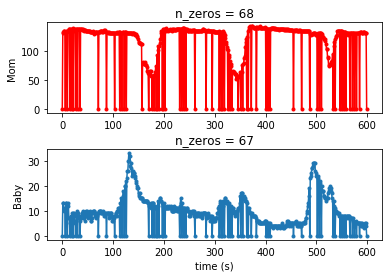

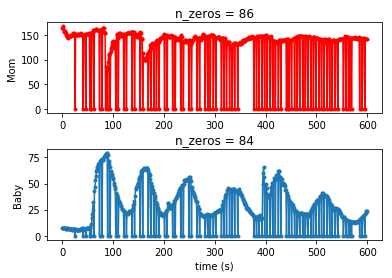

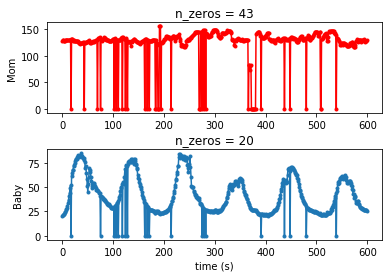

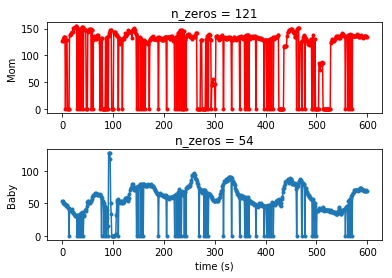

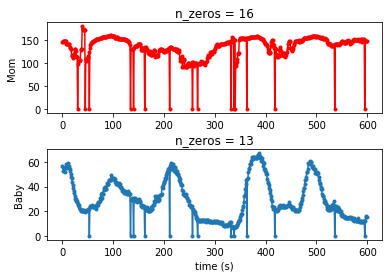

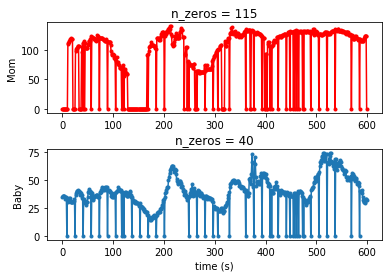

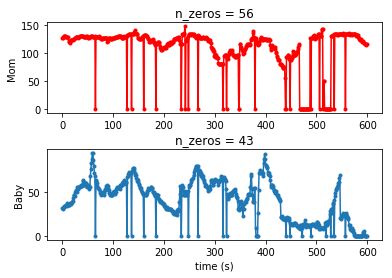

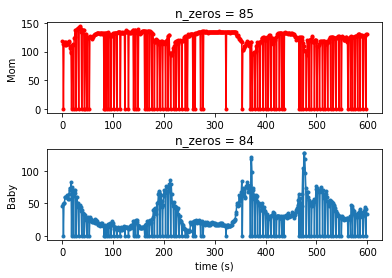

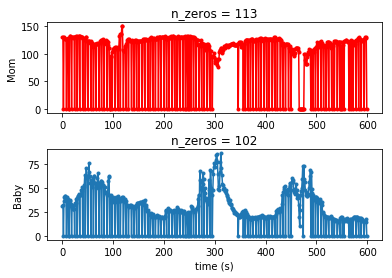

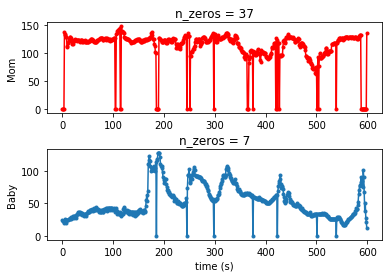

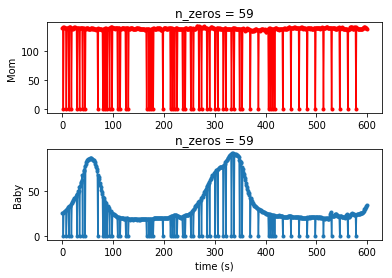

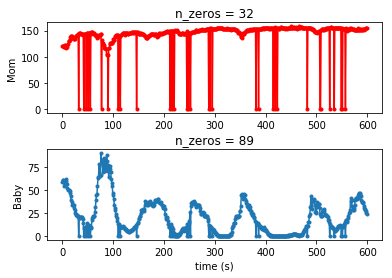

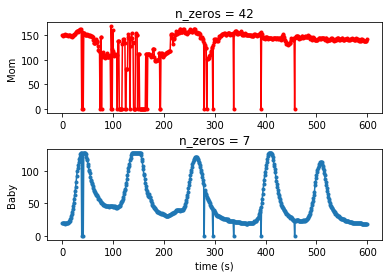

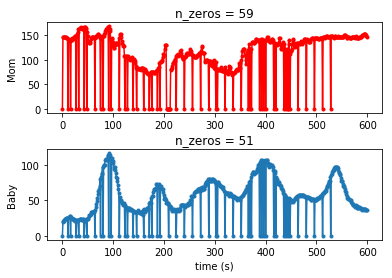

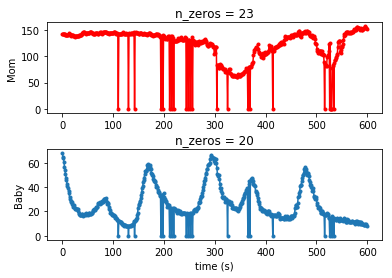

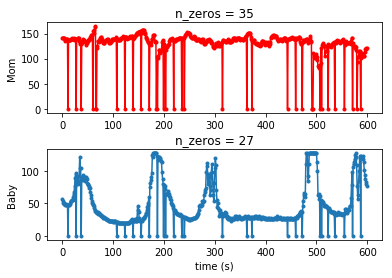

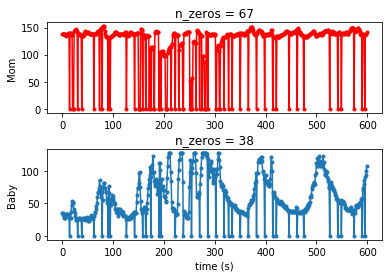

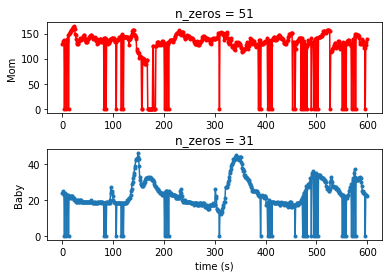

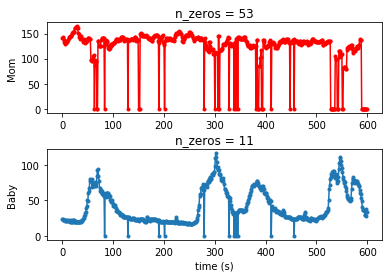

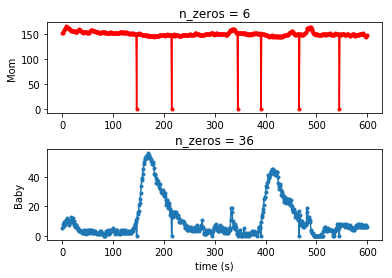

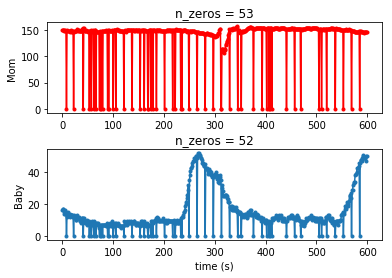

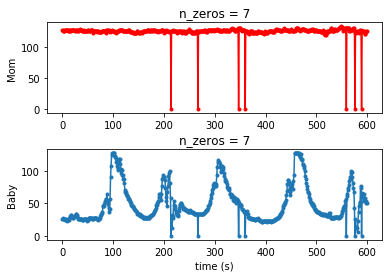

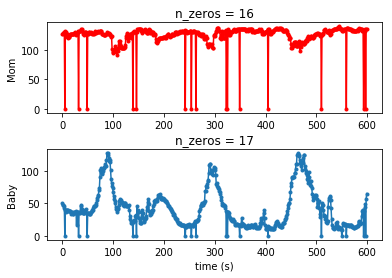

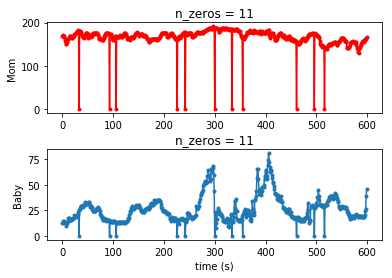

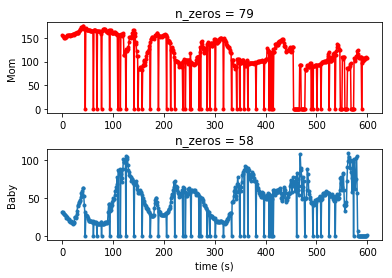

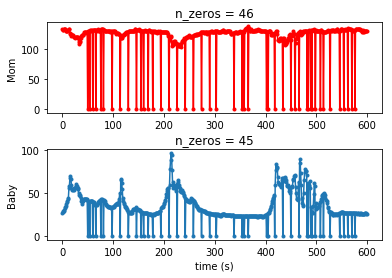

In [28]:
for i in range(M.shape[0]):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(2, 1, 1)
    plt.plot(M[i,:], '.-', color='red')
    plt.ylabel('Mom')
    plt.title('n_zeros = {0}'.format(get_n_zeros(M[i:(i+1),:])[0]))

    plt.subplot(2, 1, 2)
    plt.plot(B[i,:], '.-')
    plt.xlabel('time (s)')
    plt.ylabel('Baby')
    plt.title('n_zeros = {0}'.format(get_n_zeros(B[i:(i+1),:])[0]))

    # plt.show()
    plt.savefig(os.path.join(data_dir, '../eda/'+key[i]+'.png'))

In [44]:
d2 = d.interpolate(limit_direction='both',limit=)

In [69]:
key = list(d2['key'])
B2 = np.array(d2[[k for k in d.columns if 'b-' in k]], dtype=np.float)
M2 = np.array(d2[[k for k in d.columns if 'm-' in k]], dtype=np.float)

In [70]:
B2[B2==0] = np.nan
M2[M2==0] = np.nan

In [71]:
B2 = np.array(pd.DataFrame(B2).interpolate(limit_direction='both', axis=1))
M2 = np.array(pd.DataFrame(M2).interpolate(limit_direction='both', axis=1))

In [73]:
for i in range(M2.shape[0]):
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(2, 1, 1)
    plt.plot(M2[i,:], '.-', color='red')
    plt.ylabel('Mom')
    plt.title('n_zeros = {0}'.format(get_n_zeros(M2[i:(i+1),:])[0]))

    plt.subplot(2, 1, 2)
    plt.plot(B2[i,:], '.-')
    plt.xlabel('time (s)')
    plt.ylabel('Baby')
    plt.title('n_zeros = {0}'.format(get_n_zeros(B2[i:(i+1),:])[0]))

    # plt.show()
    plt.savefig(os.path.join(data_dir, '../eda/'+key[i]+'_interpolate.png'))
    plt.close()